Problem Statement:
The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

Importing Necessary Libraries

In [72]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


Loading the dataset

In [73]:
df = pd.read_csv("C:\\Users\\Dell\\Music\\learning\\internships\\COGSOFT\\task -3\\IRIS.csv")

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
df.duplicated().sum()

3

In [77]:
df.drop_duplicates(inplace= True)

Checking for null values

In [78]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

VISUALIZATION

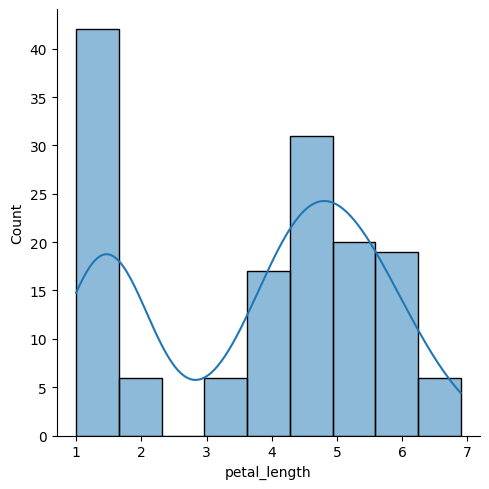

In [79]:
sns.displot(df['petal_length'],kde =True)
plt.show()

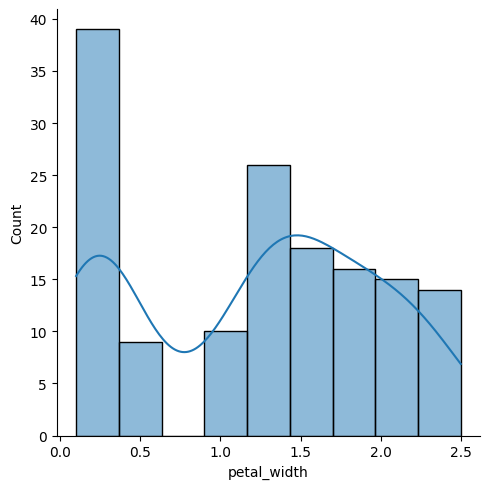

In [80]:
sns.displot(df['petal_width'],kde = True)
plt.show()

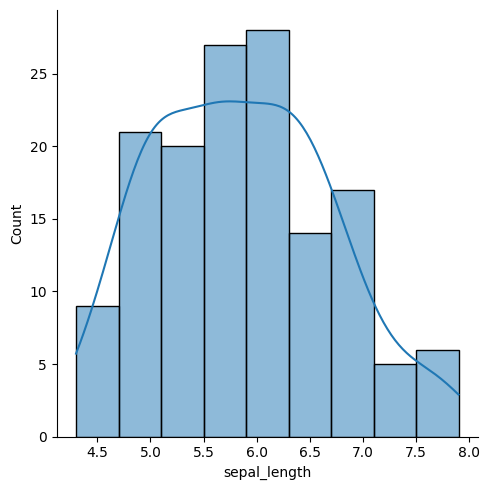

In [81]:
sns.displot(df['sepal_length'],kde = True)
plt.show()

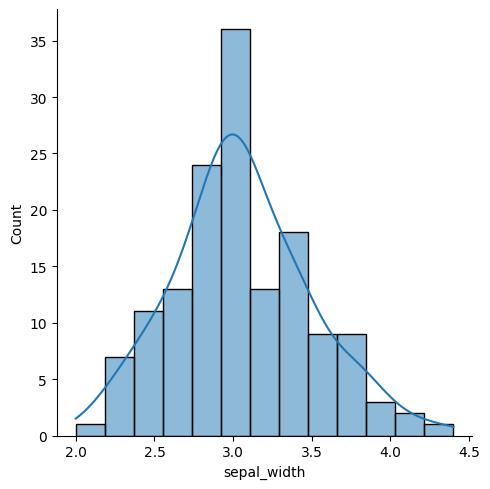

In [82]:
sns.displot(df['sepal_width'],kde = True)
plt.show()

Exploratory Data Analysis

In [83]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [84]:
df.groupby(['species'])['petal_length'].value_counts()

species          petal_length
Iris-setosa      1.4             12
                 1.5             12
                 1.3              7
                 1.6              7
                 1.7              4
                 1.9              2
                 1.2              2
                 1.0              1
                 1.1              1
Iris-versicolor  4.5              7
                 4.0              5
                 4.7              5
                 4.4              4
                 4.2              4
                 4.6              3
                 4.1              3
                 3.9              3
                 4.8              2
                 4.9              2
                 3.5              2
                 3.3              2
                 4.3              2
                 5.1              1
                 5.0              1
                 3.8              1
                 3.7              1
                 3.6              

In [85]:
df.groupby(['species'])['petal_width'].value_counts()

species          petal_width
Iris-setosa      0.2            28
                 0.3             7
                 0.4             7
                 0.1             4
                 0.6             1
                 0.5             1
Iris-versicolor  1.3            13
                 1.5            10
                 1.0             7
                 1.4             7
                 1.2             5
                 1.6             3
                 1.1             3
                 1.8             1
                 1.7             1
Iris-virginica   1.8            11
                 2.3             8
                 2.1             6
                 2.0             6
                 1.9             4
                 2.4             3
                 2.2             3
                 2.5             3
                 1.5             2
                 1.6             1
                 1.7             1
                 1.4             1
Name: count, dtype: int64

In [86]:
df.groupby(['species'])['sepal_length'].value_counts()

species          sepal_length
Iris-setosa      5.0             8
                 5.1             8
                 5.4             5
                 4.8             5
                 4.6             4
                 4.4             3
                 5.2             3
                 4.7             2
                 4.9             2
                 5.5             2
                 5.7             2
                 4.3             1
                 5.8             1
                 5.3             1
                 4.5             1
Iris-versicolor  5.5             5
                 5.7             5
                 5.6             5
                 6.1             4
                 6.0             4
                 6.7             3
                 5.8             3
                 6.3             3
                 6.6             2
                 6.4             2
                 6.2             2
                 5.9             2
                 5.0     

In [87]:
df.groupby(['species'])['sepal_width'].value_counts()

species          sepal_width
Iris-setosa      3.4             9
                 3.5             6
                 3.0             6
                 3.2             5
                 3.8             4
                 3.7             3
                 3.1             3
                 3.9             2
                 3.6             2
                 3.3             2
                 2.9             1
                 4.4             1
                 4.2             1
                 4.1             1
                 4.0             1
                 2.3             1
Iris-versicolor  3.0             8
                 2.9             7
                 2.8             6
                 2.7             5
                 2.5             4
                 2.3             3
                 2.4             3
                 2.6             3
                 3.2             3
                 3.1             3
                 2.2             2
                 3.3      

In [88]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Encoding the categorical column

In [89]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [90]:
df['species'] = label.fit_transform(df['species'])

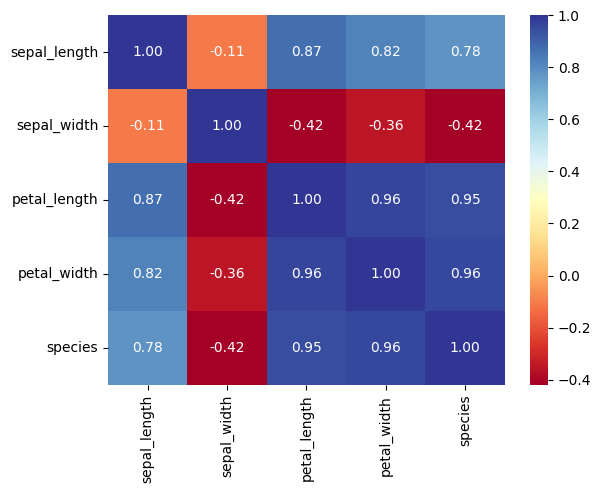

In [91]:
sns.heatmap(df.corr(numeric_only=True),cmap = "RdYlBu",annot= True,fmt = ".2f")
plt.show()

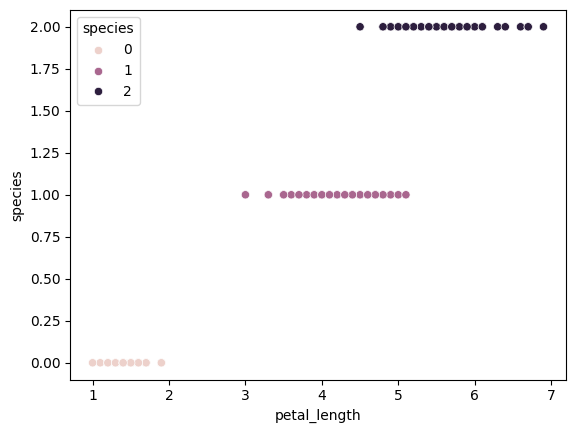

In [92]:
sns.scatterplot(x ='petal_length',y ='species',hue = "species",data = df)

plt.show()

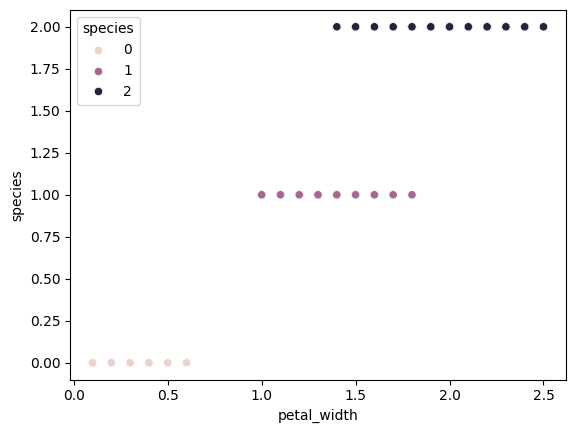

In [93]:
sns.scatterplot(x ='petal_width',y ='species',hue = "species",data = df)

plt.show()

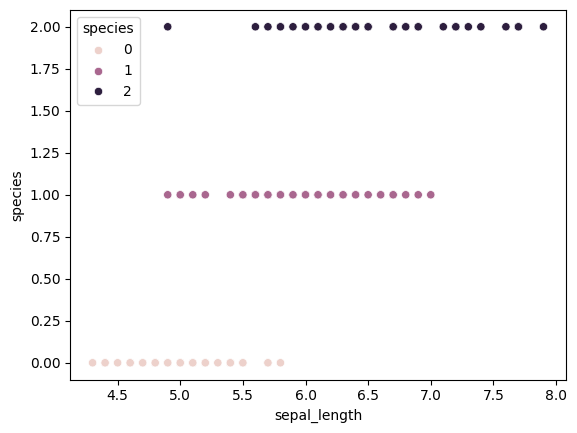

In [94]:
sns.scatterplot(x ='sepal_length',y ='species',hue = "species",data = df)

plt.show()

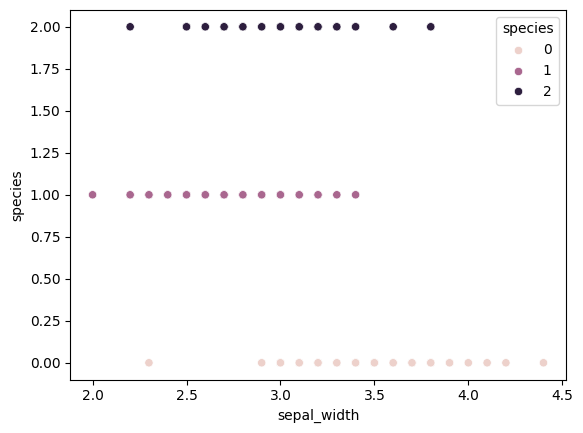

In [95]:
sns.scatterplot(x ='sepal_width',y ='species',hue = "species",data = df)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16376\2987683355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "species", data = df,palette = "Set2")


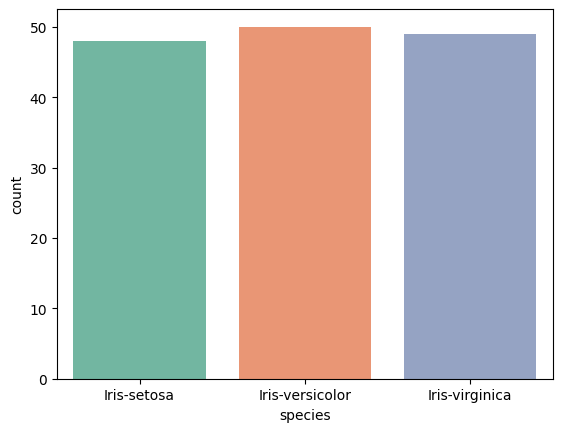

In [96]:
sns.countplot(x = "species", data = df,palette = "Set2")
plt.xticks((0,1,2),("Iris-setosa","Iris-versicolor","Iris-virginica"))
plt.show()

Splitting the dataset for trainning and testing

In [97]:
x = df.drop(columns= ['species'])
y = df['species']

Machine Learning

In [98]:
l_model  = LogisticRegression()
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
svm_model = SVC(kernel = "linear")

In [99]:
l_model.fit(x_train,y_train)


LogisticRegression()

In [100]:
y_predicted = l_model.predict(x_test)

In [101]:
accuracy = accuracy_score(y_test,y_predicted)

In [102]:
print(f"The accuracy of the logistic regression model is {round(accuracy*100)}%")

The accuracy of the logistic regression model is 93%


In [103]:
confusion = confusion_matrix(y_test,y_predicted)

In [104]:
print(confusion)

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [105]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [106]:
pred = svm_model.predict(x_test)

In [107]:
accuracy = accuracy_score(y_test,pred)

In [108]:
print(f"The accuracy of the SVM  model is {round(accuracy*100)}%")

The accuracy of the SVM  model is 97%


In [109]:
confusion = confusion_matrix(y_test,pred)

In [110]:
print(confusion)

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
